Exercise 5.1

8.471516831683186


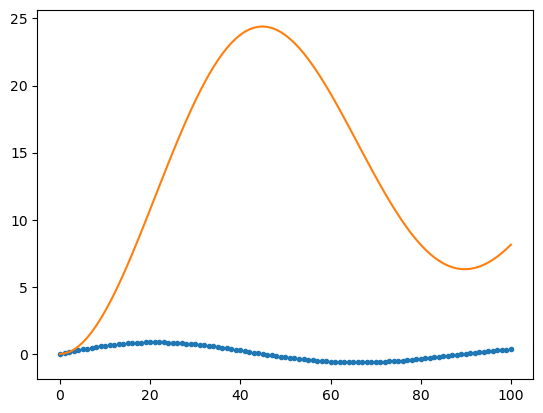

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("velocities.txt")

x = data[:,0]
y = data[:,1]

h = (x[-1]-x[0])/len(x)
a = x[0]
b = x[-1]

s = 0.5*y[0] + 0.5*y[-1]

distance = [0]

for k in range(1, len(x)):
    s += y[k]
    distance.append(distance[k-1] + 0.5*h*(y[k-1]+y[k]))
    
plt.plot(x,y, ".")
plt.plot(x, distance)
    
print(s*h)

Exercise 5.2

In [16]:
def f(x):
    return (x**4 -2*x +1)

N = 10
a = 0
b = 2
h = (b-a)/N

s = f(a) + f(b)

for k in range(1, N, 2):
    s += 4*f(a + k*h)
for k in range(2, N, 2):
    s += 2*f(a + k*h)
    
print((1/3)*h*s)

4.400426666666667


In [17]:
print((((1/3)*h*s) - 4.4)/4.4)

9.696969696972666e-05


In [18]:
def f(x):
    return (x**4 -2*x +1)

N = 100
a = 0
b = 2
h = (b-a)/N

s = f(a) + f(b)

for k in range(1, N, 2):
    s += 4*f(a + k*h)
for k in range(2, N, 2):
    s += 2*f(a + k*h)
    
print((1/3)*h*s)

4.400000042666667


In [20]:
def f(x):
    return (x**4 -2*x +1)

N = 1000
a = 0
b = 2
h = (b-a)/N

s = f(a) + f(b)

for k in range(1, N, 2):
    s += 4*f(a + k*h)
for k in range(2, N, 2):
    s += 2*f(a + k*h)
    
print((1/3)*h*s)

4.400000000004266


Exercise 5.3

In [32]:
import numpy as np

def f(t):
    return np.exp(-(t**2))
def E(f, a, x):
    N = 100
    h = (x-a)/N

    s = f(a) + f(x)

    for k in range(1, N, 2):
        s += 4*f(a + k*h)
    for k in range(2, N, 2):
        s += 2*f(a + k*h)
    
    return (1/3)*h*s
        
x = np.arange(0, 3.1, 0.1)
E_x = [E(f, 0, x_i) for x_i in x]

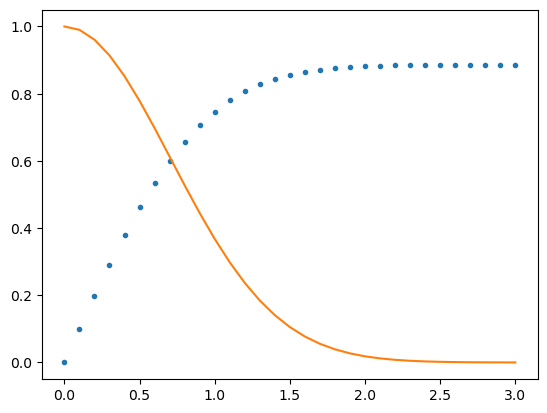

In [34]:
import matplotlib.pyplot as plt

plt.plot(x, E_x, '.')
plt.plot(x, f(x))
plt.show()

Exercise 5.4: The diffraction limit of a telescope 

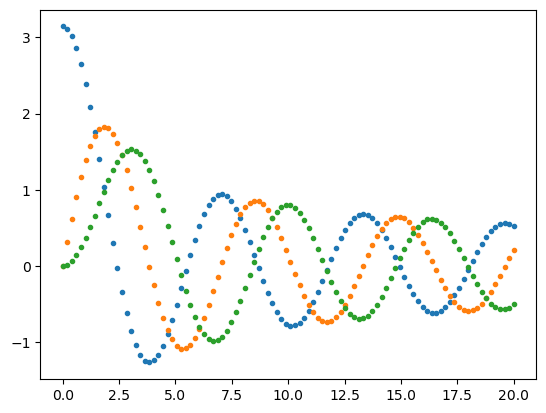

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def J(m, x):
    N = 1000
    a = 0
    b = pi
    h = (b-a)/N

    #s = f(a) + f(x)
    s = np.cos(m*a - x*np.sin(a)) + np.cos(m*b - x*np.sin(b))

    for k in range(1, N, 2):
        #s += 4*f(a + k*h)
        s += 4*np.cos(m*(a + k*h) - x*np.sin(a + k*h))
    for k in range(2, N, 2):
        #s += 2*f(a + k*h)
        s += 2*np.cos(m*(a + k*h) - x*np.sin(a + k*h))
    
    return (1/3)*h*s

x = np.linspace(0, 20, 100)

J_0 = J(0, x)
J_1 = J(1, x)
J_2 = J(2, x)


plt.plot(x, J_0, '.')
plt.plot(x, J_1, '.')
plt.plot(x, J_2, '.')

plt.show()

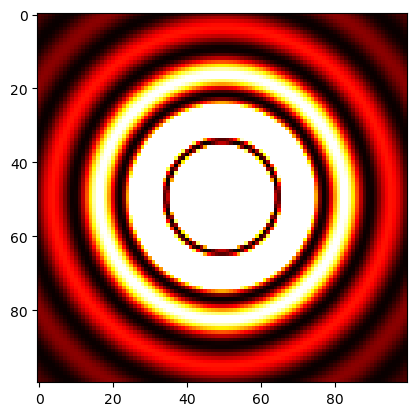

In [54]:
# b)
k = 20*pi/5
N = 100
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)

# I(r)=(J_1(kr)/kr)^2

grid = np.zeros((N,N))

for i in range(len(x)):
    for j in range(len(y)):
        grid[i,j] = (J(1, k*np.sqrt(x[i]**2 + y[j]**2))/ (k*np.sqrt(x[i]**2 + y[j]**2)))**2
        
plt.imshow(grid, 'hot', vmax=0.01)

Exercise 5.5: Error on Simpson's rule

We use $I=I_1 + ch_1^4=I_2 + ch_2^4$ with $h_1=2h_2$, so:
$$I_2-I_1=16ch_2^4 - ch_2^4=15ch_2^4,$$
but $\epsilon=ch_2^4$, then:
$$\epsilon=\frac{1}{15}(I_2-I_1)$$

Exercise 5.6: Write a program, or modify an earlier one, to once more calculate the value of the integral $\int_0^2(x^4-2x+1)dx$ from Example 5.1, using trapezoidal rule with 20 slices, but this time have the program also print an estimate of the error on the result, calculated using the method of Eq.(5.28). To do this you will need to evaluate the integral twice, once with $N_1=10$ slices and the again with $N_2=20$ slices. Then Eq.(5.28) gives the error. How does the error calculated in this manner compare with a direct computation of the error as the difference between you value for the integral and the true value of 4.4? Why do the two not agree perfectly?

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**4 - 2*x + 1)

N = 20
a = 0.
b = 2.
h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)

for k in range(1,N):
    s += f(a + k*h)
    
I2 = s*h
print(s*h)

4.426660000000001


In [6]:
N = 10
a = 0.
b = 2.
h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)

for k in range(1,N):
    s += f(a + k*h)
    
I1 = s*h
print(s*h)

4.50656


In [7]:
(1/3)*(I2-I1)

-0.026633333333333137

In [11]:
abs((1/3)*(I2-I1)) - abs(4.4 - I2)

-2.666666666743464e-05

They do not agree perfectly because this $\epsilon_2$ is neglects terms of order greater than two.

Exercise 5.7: Consider the integral

$$I=\int_0^1 \sin^2{\sqrt{100x}}dx$$

In [2]:
from math import sin, sqrt

epsilon = 10e-6

#We define the function

def f(x):
    return (sin(sqrt(100*x)))**2

N = 1
a = 0.
b = 1.



h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)

for k in range(1,N):
    s += f(a + k*h)
    
I_i = s*h

print(I_i)
    
error = 1

while error > epsilon:
    N *= 2
    h = (b-a)/N
    sum_i = 0
    for k in range(1, N, 2):
        sum_i += f(a + k*h)
    I_i_1, I_i = I_i, (0.5)*I_i + h*sum_i
    print("I =",I_i_1)
    print("Number of slices:", N)
    error = abs((1/3)*(I_i - I_i_1)) 
    print("error =", error)


0.147979484546652
I = 0.147979484546652
Number of slices: 2
error = 0.05908414108660753
I = 0.3252319078064746
Number of slices: 4
error = 0.06235031430561895
I = 0.5122828507233315
Number of slices: 8
error = 0.03642846741502771
I = 0.4029974484782483
Number of slices: 16
error = 0.009035306938832883
I = 0.43010336929474696
Number of slices: 32
error = 0.0061037654975743165
I = 0.4484146657874699
Number of slices: 64
error = 0.001832755142635293
I = 0.4539129312153758
Number of slices: 128
error = 0.000478524385808754
I = 0.45534850437280205
Number of slices: 256
error = 0.00012092069347964991
I = 0.455711266453241
Number of slices: 512
error = 3.0311066141042176e-05
I = 0.45580219965166413
Number of slices: 1024
error = 7.582826918613635e-06


In [66]:
epsilon = 10e-6

#We define the function

def f(x):
    return (sin(sqrt(100*x)))**2

N = 1
a = 0.
b = 1.



h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)

for k in range(1,N):
    s += f(a + k*h)
    
I_1 = s*h

print(I_1)

N = 2
h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)

for k in range(1,N):
    s += f(a + k*h)
    
I_2 = s*h


    
R_2_2 = I_2 + (1/(4 - 1))*(I_2 - I_1)    
 
print(I_2, R_2_2)
    
error = (1/(4 - 1))*(I_2 - I_1)


R_i_1 = [I_2, R_2_2] 

while error > epsilon:
    N += 1
    I_m = 0.5*f(a) + 0.5*f(b)
    h = (b-a)/N
    for k in range(1,N):
        I_m += f(a + k*h)
    I_m *= h
    R_i = [I_m]
    
    for m in range(N-1):
        R_i_mplus1 = R_i[m] + (1/((4**(m+1)) - 1))*(R_i[m] - R_i_1[m])
        R_i.append(R_i_mplus1)
    error = abs((1/((4**(N-1)) - 1))*(R_i[-2] - R_i_1[-1]))
    R_i_1 = R_i.copy()
    for R_i_m in R_i:
        print(R_i_m, end=' ')
    print(end='\n')
     
    
    
    
    


0.147979484546652
0.3252319078064746 0.38431604889308213
0.43079757183944845 0.4659861265171064 0.47143079835870805 
0.5122828507233315 0.5394446103512924 0.5443418426069049 0.5454991607695747 
0.45902066640404515 0.44126660496428305 0.4347214046051491 0.43298139765274024 0.4325401515228703 
0.42216668286887116 0.4098820216904798 0.4077897161388929 0.40736222902038094 0.4072617616924109 0.4072370516339256 
0.4067588542747065 0.4016229114099849 0.4010723040579519 0.40096567846936554 0.4009405939574008 0.40093441490780646 0.40093287580237885 


Exercise 5.8

In [80]:
epsilon = 10e-6

#We define the function

def f(x):
    return (sin(sqrt(100*x)))**2

a = 0
b = 1
N = 2
h = (b-a)/N

S_1 = (f(a) + f(b))
for k in range(2,N,2):
    S_1 += 2*f(a + k*h)    
S_1 *= 1/3

T_1 = 0
for k in range(1,N,2):
    T_1 += f(a + k*h)
T_1 *= 2/3

I_1 = h*(S_1 + 2*T_1)
I_1

T_i_1 = T_1
S_i_1 = S_1

error = 1

while error > epsilon:
    N *= 2
    h = (b-a)/N
    T_i = 0
    for k in range(1,N,2):
        T_i += f(a + k*h)
    T_i *= 2/3
    S_i = S_i_1 + T_i_1
    I_i = h*(S_i + 2*T_i)
    error = abs((1/15)*(I_i - I_i_1))
    T_i_1 = T_i
    S_i_1 = S_i
    print(I_i)


0.5746331650289503
0.36656898106322056
0.4391386762335798
0.45451843128504427
0.45574568635801116


Exercise 5.9

In [110]:
from gaussxw import gaussxw 
import numpy as np

def f(x):
    return ((x**4)*np.exp(x))/((np.exp(x)-1)**2)

N = 50
x, w = gaussxw(N)

def cv(T):

    
    a = 0
    b = 428/T

    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    s = 0.
    for k in range(N):
        s += wp[k]*f(xp[k])
    
    s *= 9*1000*6.022*(b**-3)*1.380649*(10e-1)
    return s

In [111]:
cv(20)

np.float64(198.33130962750593)

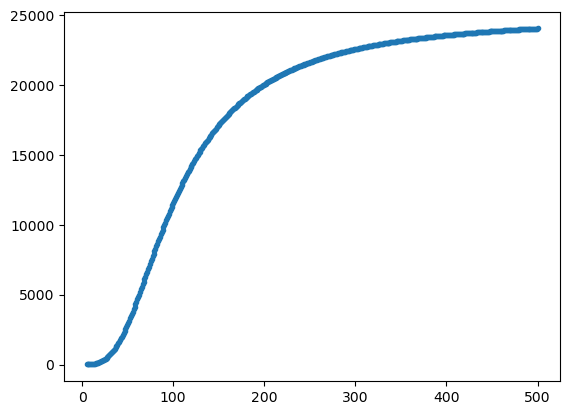

In [112]:
import numpy as np
import matplotlib.pyplot as plt

T = np.linspace(5, 500, 500)

C_v = [cv(t) for t in T]

plt.plot(T, C_v, '.')

plt.show()

np.float64(239857.42827575948)

array([85.6       , 71.42876254, 61.28321377, 53.66130653, 47.72558659,
       42.9722334 , 39.0799634 , 35.83422819, 33.0862897 , 30.72978417,
       28.68663533, 26.89823678, 25.31973918, 23.9162374 , 22.66015915,
       21.52943548, 20.50619299, 19.57580202, 18.72617273, 17.94722689,
       17.23049617, 16.56881303, 15.95607023, 15.3870317 , 14.85718261,
       14.36260928, 13.89990238, 13.46607818, 13.05851422, 12.67489614,
       12.31317383, 11.97152466, 11.64832288, 11.34211365, 11.0515912 ,
       10.77558022, 10.51301994, 10.2629505 , 10.02450129,  9.79688073,
        9.57936757,  9.3713032 ,  9.17208503,  8.98116064,  8.79802266,
        8.62220428,  8.45327528,  8.29083851,  8.13452676,  7.984     ,
        7.83894293,  7.69906273,  7.56408713,  7.43376262,  7.30785287,
        7.18613728,  7.06840973,  6.95447737,  6.84415959,  6.73728707,
        6.63370089,  6.53325176,  6.43579931,  6.3412114 ,  6.24936357,
        6.16013845,  6.07342528,  5.98911946,  5.90712211,  5.82

Exercise 5.10: Period of an anharmonic oscillator

We have
$$V(a)=\frac{1}{2}m\frac{dx}{dt}^2 + V(x),$$
then
$$\frac{dx}{dt}^2=\frac{2}{m}(V(a)-V(x)),$$
$$\frac{dx}{dt}=\left(\frac{2}{m}(V(a)-V(x))\right)^{1/2},$$
$$dt=\frac{dx}{\left(\frac{2}{m}(V(a)-V(x))\right)^{1/2}},$$
    $$T=\int_{0}^{a}4\frac{dx}{\left(\frac{2}{m}(V(a)-V(x))\right)^{1/2}},$$
    $$T=\sqrt{8m}\int_{0}^{a}\frac{dx}{\sqrt{(V(a)-V(x)}},$$

In [8]:
from gaussxw import gaussxw 
import numpy as np
import matplotlib.pyplot as plt

def f(x, a):
    return 1/(np.sqrt(a**4 - x**4))

N = 20
x, w = gaussxw(N)

def period(A, f):

    
    a = 0
    b = A

    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    s = 0.
    for k in range(N):
        s += wp[k]*f(xp[k], A)
    
    s *= np.sqrt(8)
    return s

/tmp/ipykernel_6948/723976267.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(np.sqrt(a**4 - x**4))
/tmp/ipykernel_6948/723976267.py:22: RuntimeWarning: invalid value encountered in scalar multiply
  s += wp[k]*f(xp[k], A)


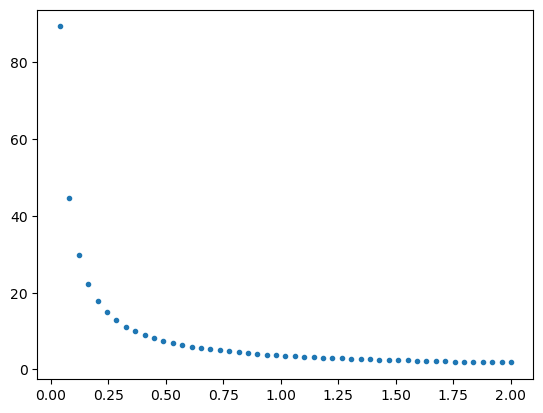

In [9]:
amplitudes = np.linspace(0, 2, 50)
periods = [period(amp, f) for amp in amplitudes]

plt.plot(amplitudes, periods, '.')

Exercise 5.11

In [18]:
from gaussxw import gaussxw 
import numpy as np
import matplotlib.pyplot as plt

def C(u):
    return np.cos(0.5*np.pi*(u**2))
def S(u):
    return np.sin(0.5*np.pi*(u**2))

N = 50
x, w = gaussxw(N)

def I(u, C, S):

    
    a = 0
    b = u

    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    s = 0.
    t = 0.
    for k in range(N):
        s += wp[k]*C(xp[k])
        t += wp[k]*S(xp[k])
    
    I_I0 = (1/8)*((2*s + 1)**2 + (2*t + 1)**2)
    return I_I0

In [23]:
x_i = np.linspace(-5, 5, 100)
u = x_i*np.sqrt(2/(3))

I_I0 = [I(u_i, C, S) for u_i in u]

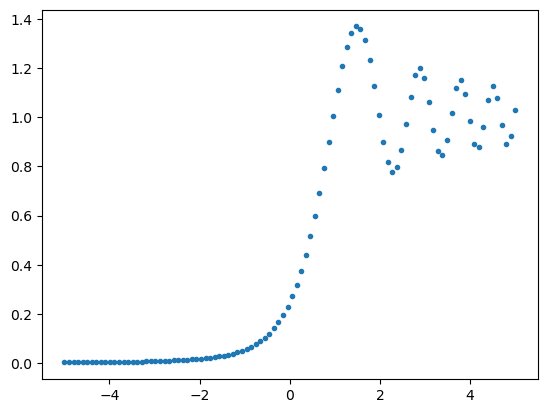

In [24]:
plt.plot(x_i, I_I0, '.')

Exercise 5.12: The Stefan-Boltzmann constant

Let $x=\hbar \omega /k_BT$ then $\omega=x k_BT/\hbar$ and $dx=\hbar/k_BTd\omega$. So

$$W=\frac{\hbar}{4\pi^2c^2}\int_{0}^{\infty}\frac{\left(x k_BT/\hbar\right)^3}{e^{x}-1}dx k_BT/\hbar,$$
$$W=\frac{\hbar}{4\pi^2c^2}\frac{k_b^4T^4}{\hbar^4}\int_{0}^{\infty}\frac{x^3}{e^{x}-1}dx=\frac{k_B^4T^4}{4\pi^2c^2\hbar^3}\int_{0}^{\infty}\frac{x^3}{e^x - 1}dx$$

$$\int_{0}^{\infty}\frac{x^3}{e^x - 1}dx = \int_{0}^{1}\frac{1}{(1-z)^2}\frac{\left(\frac{z}{1-z}\right)^3}{e^{\frac{z}{1-z}}-1}$$

In [4]:
from gaussxw import gaussxw 
import numpy as np
import matplotlib.pyplot as plt

def f(z):
    return ((z**3)/((1-z)**5))*(1/(np.exp(z/(1-z))-1)) 

N = 60
x, w = gaussxw(N)

def W(f):

    
    a = 0
    b = 1

    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    s = 0.
    
    for k in range(N):
        s += wp[k]*f(xp[k])
    
    return s

In [8]:
W_f = W(f)

/tmp/ipykernel_6290/789660317.py:6: RuntimeWarning: overflow encountered in exp
  return ((z**3)/((1-z)**5))*(1/(np.exp(z/(1-z))-1))


$$\sigma T^4= \frac{k_B^4T^4}{4\pi^2c^2\hbar^3}W(f),$$
$$\sigma = \frac{k_B^4}{4\pi^2c^2\hbar^3}W(f)$$

In [10]:
sigma = (((1.380649e-23)**4)/(4*(np.pi**2)*((299792458)**2)*((1.054571817e-34)**3)))*W_f
sigma

np.float64(5.67037442962479e-08)

Exercise 5.13: Quantum uncertainty in the harmonic oscillator

$$H_{n+1}(x)=2xH_{n}(x)-2nH_{n-1}(x)$$
$$H_0(x)=1$$
$$H_1(x)=2x$$

In [1]:
def H(x,n):
    if n==0:
        return 1
    elif n==1:
        return 2*x
    else:
        return 2*x*H(x,n-1) - 2*n*H(x,n-2)

In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

x = np.linspace(-4,4,100)
H_0 = [(1/(mt.sqrt((2**0)*mt.factorial(0)*mt.sqrt(mt.pi))))*mt.exp((-x_i**2)/2)*H(x_i, 0) for x_i in x]
H_1 = [(1/(mt.sqrt((2**1)*mt.factorial(1)*mt.sqrt(mt.pi))))*mt.exp((-x_i**2)/2)*H(x_i, 1) for x_i in x]
H_2 = [(1/(mt.sqrt((2**2)*mt.factorial(2)*mt.sqrt(mt.pi))))*mt.exp((-x_i**2)/2)*H(x_i, 2) for x_i in x]
H_3 = [(1/(mt.sqrt((2**3)*mt.factorial(3)*mt.sqrt(mt.pi))))*mt.exp((-x_i**2)/2)*H(x_i, 3) for x_i in x]

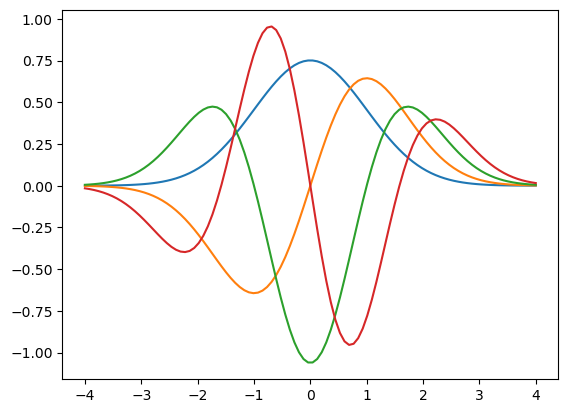

In [3]:
plt.plot(x, H_0)
plt.plot(x, H_1)
plt.plot(x, H_2)
plt.plot(x, H_3)

plt.show()

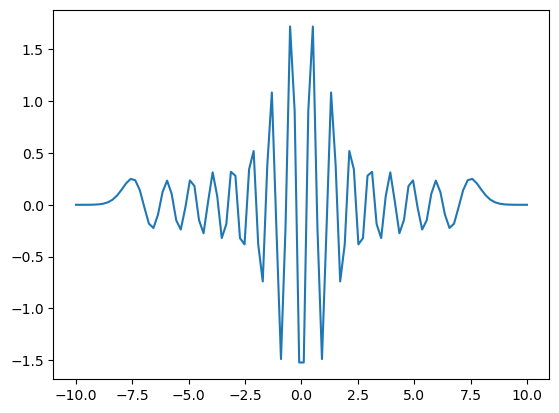

In [7]:
x = np.linspace(-10,10,100)
H_30 = np.exp((-x**2)/2)*H(x, 30)
H_30*= (1/(mt.sqrt((2**30)*mt.factorial(30)*mt.sqrt(mt.pi))))
#(1/(mt.sqrt((2**30)*mt.factorial(30)*mt.sqrt(mt.pi))))*mt.exp((-x_i**2)/2)*
plt.plot(x, H_30)

In [33]:
from gaussxw import gaussxw 
import numpy as np
import matplotlib.pyplot as plt 

N = 100
x, w = gaussxw(N)

def I(f, n, a, b):

    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    s = 0.
    
    for k in range(N):
        s += wp[k]*f(xp[k],n)
    
    return s

def f(x,n):
    integrand = (H((x/(1-x**2)),n)**2)*((x/(1-x**2))**2)*np.exp(-(x/(1-x**2))**2)*((1+x**2)/((1-x**2)**2))
    return integrand

sol = I(f, 5, -1, 1) 

print(sol)

sol = (1/mt.sqrt((2**5)*mt.factorial(5)*mt.sqrt(mt.pi)))*mt.sqrt(sol)

print(sol)

24162.09085655379
1.8841443666214617


In [19]:
sol

7.885496737133856e-11